In [58]:
%reset -f
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import numpy as np
from scipy.sparse import lil_matrix


def generate_full_rank_sparse_integer_system(N, density=0.01, value_range=(-10, 10), random_state=None):
    """
    フルランクなスパース整数連立一次方程式 Ax = b を生成する。
    
    N: 変数（=行数=列数）
    density: 全体に占める非ゼロ要素割合
    value_range: 非ゼロ整数値の範囲（例：(-5, 5)）
    """
    if random_state is not None:
        np.random.seed(random_state)

    A = lil_matrix((N, N), dtype=int)

    # ステップ1: 各行に1つ以上の非ゼロ（対角線に1を置くことでrankを確保）
    for i in range(N):
        val = 0
        while val == 0:
            val = np.random.randint(value_range[0], value_range[1] + 1)
        A[i, i] = val

    # ステップ2: ランダムな位置に追加で非ゼロ整数を入れる（スパース性の調整）
    total_nonzeros_target = int(N * N * density)
    current_nonzeros = N  # すでに対角にN個ある
    while current_nonzeros < total_nonzeros_target:
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        if A[i, j] == 0:
            val = 0
            while val == 0:
                val = np.random.randint(value_range[0], value_range[1] + 1)
            A[i, j] = val
            current_nonzeros += 1

    # bベクトルも整数で
    b = np.random.randint(value_range[0], value_range[1] + 1, size=N)

    return A.tocsr(), b

N = 5
A, b = generate_full_rank_sparse_integer_system(N, density=0.5, value_range=(-5, 5))

print(f"A.shape = {A.shape}, non zero = {A.nnz}, rank = {np.linalg.matrix_rank(A.toarray())}")
print(A.toarray()) 
print(b)

A.shape = (5, 5), non zero = 12, rank = 5
[[-3 -4  4  0  0]
 [ 5 -3  0 -3 -4]
 [ 1  0 -1  0  0]
 [ 0  0  0 -2  3]
 [ 0  0  0  0 -5]]
[1 1 2 5 0]


In [60]:
from mechanics import *
import string

vars = string.ascii_lowercase[:N]

system = (
    System()
    .add_variable(' '.join(vars))
)
for i in range(N):
    system.equate(
        '+'.join([f'{A[i, j]}*{vars[j]}' for j in range(N)]),
        b[i],
    )
system.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Indices: ()
match [Eq_0 <- b, {}, Eq_1 <- a, {}, Eq_2 <- c, {}, Eq_3 <- d, {}, Eq_4 <- e, {}]
Edges: ['Eq_0 -> b, c, a', 'b -> Eq_0', 'Eq_1 -> b, d, e, a', 'a -> Eq_1', 'Eq_2 -> c, a', 'c -> Eq_2', 'Eq_3 -> d, e', 'd -> Eq_3', 'Eq_4 -> e', 'e -> Eq_4']
Block #0(equations=('Eq_4',), unknowns=(e,)), knowns=())
Block #1(equations=('Eq_3',), unknowns=(d,)), knowns=(e,))
Block #2(equations=('Eq_2', 'Eq_0', 'Eq_1'), unknowns=(b, a, c)), knowns=(d, e))


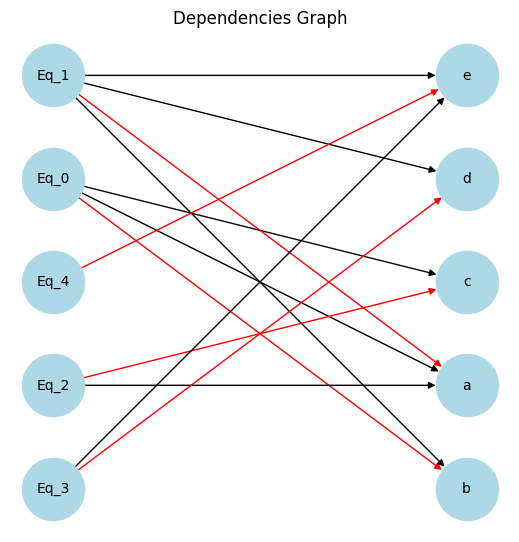

In [63]:
solver = system.solver()
solver.plot_dependencies()
# solver.plot_jacobian()
# solver.print_jacobian()

In [ ]:
solver.run({})

TypeError: Solver.run() missing 1 required positional argument: 'condition'